In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Nathan\Documents\WGU\D600\Task 3\D600 Task 3 Dataset 1 Housing Information.csv")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['SquareFootage','NumBathrooms', 'NumBedrooms', 'BackyardSpace',
        'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter',
        'EmploymentRate', 'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities',
        'TransportAccess', 'PreviousSalePrice']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=None)
X_pca_all = pca.fit_transform(X_scaled)

pca_columns = [f'PC{i+1}' for i in range(X_pca_all.shape[1])]
df_pca = pd.DataFrame(X_pca_all, columns=pca_columns)

df_pca.to_csv('pca_transformed_data.csv', index=False)

In [3]:
variables = df[['Price', 'SquareFootage','NumBathrooms', 'NumBedrooms', 'BackyardSpace',
           'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter',
           'EmploymentRate', 'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities',
           'TransportAccess', 'PreviousSalePrice']]
variable_stats = variables.describe()
print(variable_stats)

              Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
count  7.000000e+03    7000.000000   7000.000000  7000.000000    7000.000000   
mean   3.072820e+05    1048.947459      2.131397     3.008571     511.507029   
std    1.501734e+05     426.010482      0.952561     1.021940     279.926549   
min    8.500000e+04     550.000000      1.000000     1.000000       0.390000   
25%    1.921075e+05     660.815000      1.290539     2.000000     300.995000   
50%    2.793230e+05     996.320000      1.997774     3.000000     495.965000   
75%    3.918781e+05    1342.292500      2.763997     4.000000     704.012500   
max    1.046676e+06    2874.700000      5.807239     7.000000    1631.360000   

         CrimeRate  SchoolRating    AgeOfHome  DistanceToCityCenter  \
count  7000.000000   7000.000000  7000.000000           7000.000000   
mean     31.226194      6.942923    46.797046             17.475337   
std      18.025327      1.888148    31.779701             12.02498

In [4]:
pca_matrix = pd.DataFrame(X_pca_all, columns=[f'PC{i+1}' for i in range(X_pca_all.shape[1])])

print(pca_matrix.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.899945 -0.321092 -1.554966  0.110730 -0.126251  1.589749  0.711681   
1 -0.805220  0.664521 -0.877927 -1.689104  0.397888 -0.445135 -0.769102   
2 -0.295618  1.875894 -1.665436  0.817241  0.487000  0.905630  0.049423   
3 -1.054050  0.084872 -0.199952 -0.177118  0.222900 -0.325076 -1.557940   
4 -2.173687  1.055700 -0.579576 -0.130284 -1.017059  0.004817 -0.081007   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.246433 -0.482176 -0.615057 -0.497830 -0.166842  0.855549  0.087778  
1 -0.337006 -1.493831  0.257016  0.051287  0.448326  0.150981 -0.707251  
2 -0.321857  0.615564 -0.000373  0.813414  0.345321 -0.801561 -0.178838  
3 -0.347143 -0.280309 -1.234242  0.789672  0.365198 -0.130226 -0.231017  
4 -1.448811  0.955163  2.296010  0.369945  0.469296  0.343436 -0.280579  


Number of components to retain (Kaiser Rule): 5


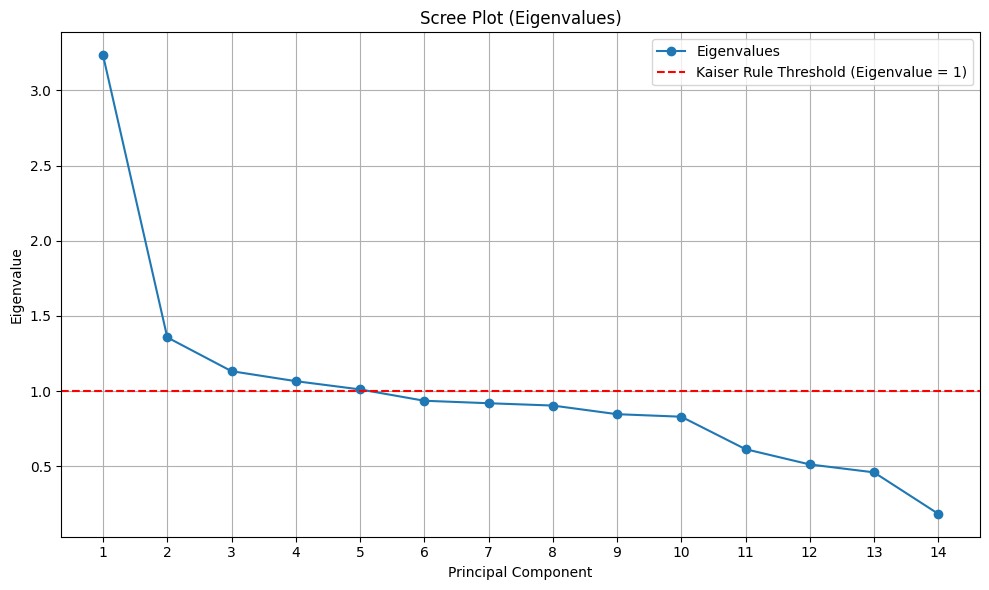

In [5]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

kaiser_rule_count = np.sum(explained_variance > 1)
print(f"Number of components to retain (Kaiser Rule): {kaiser_rule_count}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Rule Threshold (Eigenvalue = 1)')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Variance (Eigenvalue)': explained_variance,
    'Explained Variance Ratio': explained_variance_ratio
})

print(variance_df)

   Principal Component  Variance (Eigenvalue)  Explained Variance Ratio
0                  PC1               3.233846                  0.230956
1                  PC2               1.357004                  0.096915
2                  PC3               1.132260                  0.080864
3                  PC4               1.065852                  0.076121
4                  PC5               1.010996                  0.072204
5                  PC6               0.935580                  0.066818
6                  PC7               0.919073                  0.065639
7                  PC8               0.903645                  0.064537
8                  PC9               0.846225                  0.060436
9                 PC10               0.829396                  0.059234
10                PC11               0.613475                  0.043813
11                PC12               0.511933                  0.036561
12                PC13               0.459153                  0

In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]) 
final_df = pd.concat([X_pca, df['Price']], axis=1)


y = df['Price']

X = final_df.drop(columns=['Price'])
y = final_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.to_csv('pca_train.csv', index=False)
X_test.to_csv('pca_test.csv', index=False)

print("Data split and saved successfully")

Data split and saved successfully


In [8]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2068.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:08:08   Log-Likelihood:                -62606.
No. Observations:                4900   AIC:                         1.252e+05
Df Residuals:                    4894   BIC:                         1.253e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.075e+05   1224.191    251.217      0.0

In [9]:
X_be = X_train.copy()
y_be = y_train.copy()

X_be = sm.add_constant(X_be)

def backward_elimination(X, y, significance_level=0.05):
    iteration = 1
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            print(f"Iteration {iteration}: Dropping '{excluded_feature}' (p = {max_p_value:.4f})")
            X = X.drop(columns=excluded_feature)
            iteration += 1
        else:
            break
    return model, X

optimized_model, X_train_optimized = backward_elimination(X_be, y_be)

print("Final Model Summary")
print(optimized_model.summary())

Iteration 1: Dropping 'PC5' (p = 0.9016)
Iteration 2: Dropping 'PC3' (p = 0.3774)
Final Model Summary
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3447.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:08:25   Log-Likelihood:                -62606.
No. Observations:                4900   AIC:                         1.252e+05
Df Residuals:                    4896   BIC:                         1.252e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------